In [1]:
# Feedforward Neural Network for CIFAR-10-like dataset (from train_data.csv and test_data.csv)

import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# a. Import necessary packages (done above)

# b. Load the training and testing data
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

# Separate features and labels
X_train = train_data.drop(columns=['label']).values
y_train = to_categorical(train_data['label'].values,10)

X_test = test_data.drop(columns=['label']).values
y_test = to_categorical(test_data['label'].values,10)

# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0







In [2]:
# c. Define the network architecture using Keras
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(3072,)),  # Input layer
    layers.Dense(256, activation='relu'),                       # Hidden layer 1
    layers.Dense(128, activation='relu'),                       # Hidden layer 2
    layers.Dense(10, activation='softmax')                      # Output layer (10 classes)
])

# d. Compile and train the model using Adam optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_test, y_test))



Epoch 1/10


98/98 [==============================] - 7s 57ms/step - loss: 1.9779 - accuracy: 0.2863 - val_loss: 1.8304 - val_accuracy: 0.3342
Epoch 2/10
98/98 [==============================] - 5s 48ms/step - loss: 1.7577 - accuracy: 0.3718 - val_loss: 1.6935 - val_accuracy: 0.3930
Epoch 3/10
98/98 [==============================] - 5s 48ms/step - loss: 1.6600 - accuracy: 0.4078 - val_loss: 1.6002 - val_accuracy: 0.4332
Epoch 4/10
98/98 [==============================] - 4s 45ms/step - loss: 1.5930 - accuracy: 0.4358 - val_loss: 1.5730 - val_accuracy: 0.4476
Epoch 5/10
98/98 [==============================] - 5s 48ms/step - loss: 1.5350 - accuracy: 0.4515 - val_loss: 1.6054 - val_accuracy: 0.4344
Epoch 6/10
98/98 [==============================] - 5s 49ms/step - loss: 1.5053 - accuracy: 0.4653 - val_loss: 1.4938 - val_accuracy: 0.4674
Epoch 7/10
98/98 [==============================] - 5s 51ms/step - loss: 1.4593 - accuracy: 0.4798 - val_loss: 1.4881 - val_accuracy: 0.4679
Epoch 8/10


313/313 - 1s - loss: 1.4565 - accuracy: 0.4865 - 888ms/epoch - 3ms/step

Test Accuracy: 0.4865
Test Loss: 1.4565


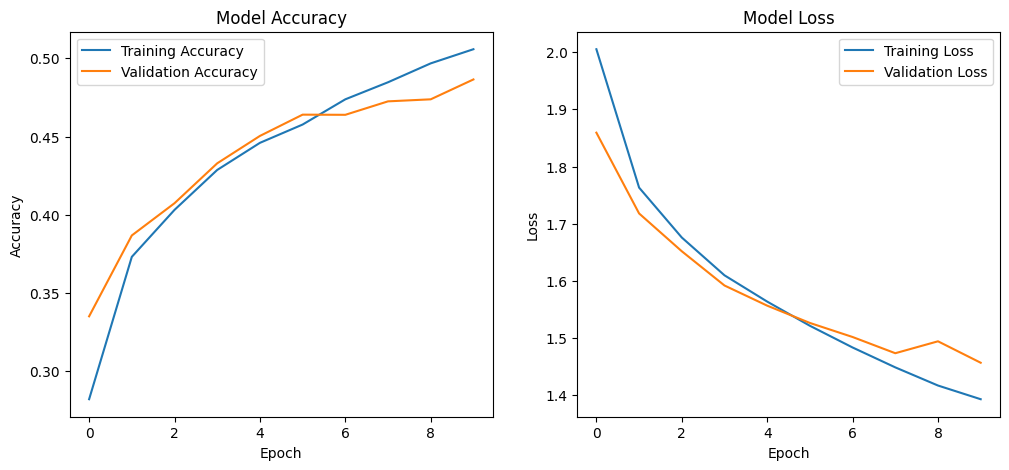

In [4]:

# e. Evaluate the network
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# f. Plot the training loss and accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()